In [1]:
from sentence_transformers import SentenceTransformer
import random
import torch
import numpy as np
from models import Finbank
from property_matching import PropertyMatcher
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

http://dl.turkunlp.org/finnish-embeddings/

In [2]:

wm = Finbank('/projets/melodi/gsantoss/data/embeddings/fb.txt', '/projets/melodi/gsantoss/data/embeddings/fbe.bin')
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

property_matcher = PropertyMatcher(wm, model)
property_matcher.match('/projets/melodi/gsantoss/data/conference', '/projets/melodi/gsantoss/data/reference')

----------------------------------------------------------------------------------------------------
cmt.owl Conference.owl
# Person email string <> Person has_an_email string
# Reviewer assignExternalReviewer ExternalReviewer <> Reviewer invites_co-reviewers Reviewer
# ExternalReviewer assignedByReviewer Reviewer <> Reviewer invited_by Reviewer
✓ email has_an_email
X ConferenceMember memberOfConference Conference <> Committee_member was_a_member_of Committee
X Conference hasConferenceMember ConferenceMember <> Committee has_members Committee_member
ontology iterations: 7552
----------------------------------------------------------------------------------------------------
confOf.owl iasted.owl
ontology iterations: 2952
----------------------------------------------------------------------------------------------------
edas.owl sigkdd.owl
# Sponsorship hasCostAmount int <> Registration_fee Price int
# Conference endDate dateTime <> Conference End_of_conference dateTime
# Conference st

(0.8275862068965517, 0.5217391304347826, 0.64)

In [3]:
res = []

for th in tqdm(np.arange(0, 1, 0.05)):
    res.append(property_matcher.match('/projets/melodi/gsantoss/data/conference', '/projets/melodi/gsantoss/data/reference', th))

  0%|          | 0/20 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
cmt.owl Conference.owl
# Person email string <> Person has_an_email string
# Reviewer assignExternalReviewer ExternalReviewer <> Reviewer invites_co-reviewers Reviewer
# ExternalReviewer assignedByReviewer Reviewer <> Reviewer invited_by Reviewer
✓ email has_an_email
✓ assignExternalReviewer invites_co-reviewers
✓ assignedByReviewer invited_by
X ProgramCommitteeMember addedBy Administrator <> Committee has_a_committee_chair Chair
X ConferenceMember memberOfConference Conference <> Conference_volume has_parts Conference_part
X Co-author co-writePaper Paper <> Co-chair was_a_committe_co-chair_of Committee
X Paper hasCo-author Co-author <> Committee has_a_committee_co-chair Co-chair
X Administrator enterConferenceDetails Conference <> Topic is_a_topis_of_conference_parts Conference_part
X ConferenceMember memberOfConference Conference <> Committee_member was_a_member_of Committee
X Confere

In [10]:
list(map(lambda x: x[2], res))

[0.5306122448979592,
 0.5473684210526316,
 0.5274725274725275,
 0.5333333333333332,
 0.5581395348837209,
 0.5714285714285715,
 0.5853658536585366,
 0.5853658536585366,
 0.6,
 0.6233766233766235,
 0.6233766233766235,
 0.6233766233766235,
 0.6233766233766235,
 0.64,
 0.5151515151515151,
 0.46875000000000006,
 0.39344262295081966,
 0.32727272727272727,
 0.29629629629629634,
 0.23076923076923078]

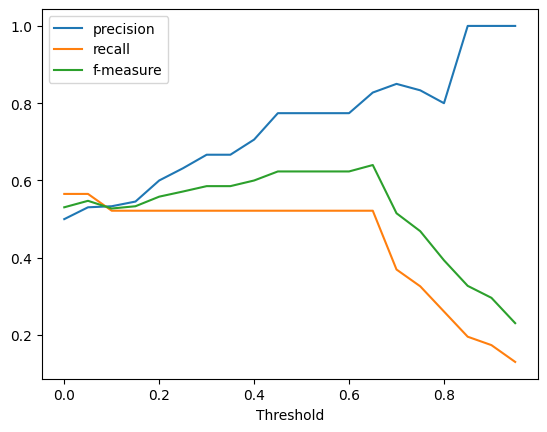

In [11]:
import numpy

plt.plot(np.arange(0, 1, 0.05), list(map(lambda x: x[0], res)), label="precision")
plt.plot(np.arange(0, 1, 0.05), list(map(lambda x: x[1], res)), label="recall")
plt.plot(np.arange(0, 1, 0.05), list(map(lambda x: x[2], res)), label="f-measure")
plt.legend()
plt.xlabel('Threshold')
plt.savefig('prop.png', dpi=300)
plt.show()
